In [ ]:
# pip install networkx
import time
import numpy as np
from scipy.spatial.distance import hamming
import math
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import random

In [ ]:
# input read from input file
f=open('inputfile3','r')
R=int(f.readline())
C=int(f.readline())
entries = list(map(int, f.readline().split()))
matrix_A = np.array(entries).reshape(R, C)
K=int(f.readline())
vector=list(map(int ,f.readline().split()))
centers=np.array(vector).reshape(K,R)
p=int(f.readline())
q=int(f.readline())
n=q*K


print("number of row :",R)
print("number of column :",C)
print("input matrix :",matrix_A)
print("number of cluster :",K)
print("vector is :",centers)
print("value of p :",p)
print("value of q :",q)
print("value of K*q :",n)
finalcender=[]

number of row : 5
number of column : 20
input matrix : [[0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1]
 [0 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1]
 [0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1]
 [0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 1]
 [0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1]]
number of cluster : 4
vector is : [[0 0 0 0 0]
 [1 1 1 1 1]
 [1 0 0 1 1]
 [1 1 1 0 0]]
value of p : 2
value of q : 5
value of K*q : 20


In [ ]:
R=5
C=600
matrix_A=np.mod(np.random.permutation(C*R).reshape(R,C),2) 
print(matrix_A)
K=10
centers=np.mod(np.random.permutation(K*R).reshape(K,R),2)
print(centers)
p=10
q=50
n=q*K
finalcender=[]

[[0 0 1 ... 1 0 0]
 [0 0 1 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 [0 0 1 ... 0 1 1]
 [0 1 1 ... 1 0 1]]
[[0 1 0 1 0]
 [1 0 1 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [1 1 1 1 0]
 [1 1 0 0 1]
 [1 0 0 1 1]
 [1 1 0 0 0]
 [1 1 0 1 1]
 [0 1 0 0 1]]


In [ ]:
R=10
C=400
matrix_A=np.mod(np.random.permutation(C*R).reshape(R,C),2) 
print(matrix_A)
K=5
centers=np.mod(np.random.permutation(K*R).reshape(K,R),2)
print(centers)
p=5
q=30
n=q*K
finalcender=[]

[[0 0 1 ... 0 1 0]
 [0 0 1 ... 1 1 1]
 [1 1 0 ... 0 1 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 1 1]
 [1 0 0 ... 0 0 0]]
[[1 1 1 1 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 1 1 1 0]
 [1 1 1 0 1 1 1 1 0 0]
 [1 1 1 0 0 0 0 1 0 0]]


In [ ]:
# construct bipartite graph and find minimus weight of perfect matching 
#  we use networkx library for construction of graph and finding min weight of perfect matching
start_time = time.time()
finalcender=[]
def perfect_matching_bipartite(centers):
  B = nx.Graph()
  top=[]
  bottom=[]
  v='v'
  u='u'
  w='w'
  temp=0
  count=0
  cost=0
  a=0
  for i in range(n):
    A=v+f'{i}'
    top.append(i)
  for i in range(n):
    if i<C:
      A=u+f'{i}'
      bottom.append(A)
    else:
      A=w+f'{i}'
      bottom.append(A)
  # B.add_nodes_from(top, bipartite=0)
  # B.add_edges_from(bottom,bipartite=1)
  print(top)
  print(bottom)
  # print(top[0])
  for i in range(n):
    
      for j in range(n):
        count=count+1
        if a<q:
        
          if j<len(matrix_A[0]):
            u=matrix_A[:,j]
            cost=hamming(centers[temp],u)*len(u)
          else:
            cost=0
          B.add_edge(top[i], bottom[j],weight = cost)
        
          
      a=a+1
      if a==q:
        temp=temp+1
        a=0      
    

     
   
      
# print(B)
# print(n)
# print(count)
  my_matching = bipartite.matching.minimum_weight_full_matching(B, top, "weight")
  print(my_matching)
  return (my_matching)
  # making_cluster(my_matching)
# cerate cluster using bipartite graph
def making_cluster(my_matching):
  CI=[]
  count=0
  w="cluster"
  s="sonu"
  for x in range(n):
    val=(my_matching[x])
    val=int(val[1:])
    if(x%q==0):
        # print(x)
        count=count+1
        A=w+f'{count}'
        CI.append(A)
    if val<C:
    
      CI.append(matrix_A[:,val])
      # if(x%q==0):
      #   CI.append(q)
  CI.append(s) 
  print(CI)
  print(count)
  return CI
  # finding_cost(CI)


# find total cost of clusting
def finding_cost(CI,centers):
  print("raj")
  print(centers)
  cost=0
  temp=-1
  for i in range(len(CI)):
    u=CI[i]
    if(len(u)==R):
      cost=cost+hamming(centers[temp],u)*len(u)
    else:
      temp=temp+1
  print("total cost is:",cost)
  return cost


# //find new cenders using mejority rule:

def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return finalcender
  # print(finalcender)
  # print(c)
  # return finalcender
     
def call_cenderfind(CI):
  mat=[]
  mat1=[]
  print(len(CI))
  for x in range(len(CI)):
    if(type(CI[x])==str):
      if(len(mat)>0):
        # print(mat)
        for i in range(len(mat[0])):
          row =[]
          for item in mat:
            row.append(item[i])
          mat1.append(row)
        # print(mat)
        cenderfind(mat1,len(mat1))
        mat.clear()
        mat1.clear()
    else:
      mat.append(CI[x])
  # cenderfind(mat,len(mat)) 

# call_cenderfind()
  print("sonu")
  print(finalcender)
  

  print(type(finalcender))
  print(centers)
  print(type(centers))  
  # return finalcender




def main():
    print("Hello World!")
    
    my_matching = perfect_matching_bipartite(centers)
    CI = making_cluster(my_matching)
    print(CI)
    # finding_cost(CI,centers)
    cost = finding_cost(CI,centers)
    print("cost is: ",cost)
    while(True):
      call_cenderfind(CI)
      print("hii")
      # finalcender= np.array(finalcender)
      
      temp_cost = finding_cost(CI,finalcender)
      # temp_cost=15
      if(cost<=temp_cost):
        print("final cluster is :",CI)
        print("final cenders is :",finalcender)
        print("minimum cost of capacited clustering cost is :",cost)
        print("--- %s seconds  ---" % (time.time() - start_time))
        break
      else:
        # centers=finalcender
        my_matching = perfect_matching_bipartite(finalcender)
        CI = making_cluster(my_matching)
        print(CI)
        # finding_cost(CI,centers)
        cost = finding_cost(CI,finalcender)





  


if __name__ == "__main__":
    main()


Hello World!
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
['u0', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u21', 'u22', 'u23', 'u24', 'u25', 'u26', 'u27', 'u28', 'u29', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u37', 'u38', 'u39', 'u40', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u48', 'u49', 'u50'

# Algorithm B

In [ ]:
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return c 
def median_set_creation(marrix_A):
  # for j in range(len(matrix_A)):
    for i in range(C):
      for q in range(R):
        for j in range(C):
          u=matrix_A[:,i]
          v=matrix_A[:,j]
          cost=hamming(v,u)*len(v)
          if cost<=q:
            median.append(v)
        x= np.array(median)
        x=x.T
        print(x)    
        cenderfind(x, len(x))
        median.clear()
finalcender=[]
median=[]
median.clear()
median_set_creation(matrix_A)        
print(median)


print(len(median))
print(len(finalcender))
print(finalcender)  

Streaming output truncated to the last 5000 lines.
 [1]
 [0]]
[[1 1 1 0 1 1]
 [0 1 1 0 0 0]
 [0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]
 [1 0 0 0 1 0]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1]
 [0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
 [1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
[[1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
  1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1]
 [1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
  1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0

In [ ]:
def helper(u,median):
  # count=0
  temp.clear()
  for x in range(len(median)):
    cost=0
    
    for y in range(len(u)):
      cost+=hamming(median[x],u[y])*len(u[i])
    temp.append(cost)
    # count+=1
  # print(len(temp))
  min_value = min(temp)
  min_index=temp.index(min_value)
    # print(min_index)
    # cl.append(matrix_A[:, min_index])
  # del temp[min_index]
  newcender.append(median[min_index])
    # CI.append(mat[:,min_index])





u=[]
u.clear()
temp=[]
newcender=[]
mat=matrix_A
for x in range(K):
  u.clear()
  for i in range(p):
    u.append(mat[:,i])
    mat = np.delete(mat, i, axis=1)
  helper(u,finalcender)  

print(len(u))
# print(temp)
# print(K)
# print(len(newcender))
print(newcender)



5
[[0, 0, 1, 0, 0, 1, 1, 0, 1, 1], [1, 0, 0, 1, 1, 1, 0, 0, 0, 1], [0, 1, 1, 0, 1, 0, 0, 1, 1, 0], [1, 0, 1, 1, 0, 0, 0, 1, 1, 0], [1, 0, 0, 1, 1, 1, 1, 1, 0, 0]]


In [ ]:
centers=newcender

In [ ]:
# construct bipartite graph and find minimus weight of perfect matching 
#  we use networkx library for construction of graph and finding min weight of perfect matching
start_time = time.time()
finalcender=[]
def perfect_matching_bipartite(centers):
  B = nx.Graph()
  top=[]
  bottom=[]
  v='v'
  u='u'
  w='w'
  temp=0
  count=0
  cost=0
  a=0
  for i in range(n):
    A=v+f'{i}'
    top.append(i)
  for i in range(n):
    if i<C:
      A=u+f'{i}'
      bottom.append(A)
    else:
      A=w+f'{i}'
      bottom.append(A)
  # B.add_nodes_from(top, bipartite=0)
  # B.add_edges_from(bottom,bipartite=1)
  print(top)
  print(bottom)
  # print(top[0])
  for i in range(n):
    
      for j in range(n):
        count=count+1
        if a<q:
        
          if j<len(matrix_A[0]):
            u=matrix_A[:,j]
            cost=hamming(centers[temp],u)*len(u)
          else:
            cost=0
          B.add_edge(top[i], bottom[j],weight = cost)
        
          
      a=a+1
      if a==q:
        temp=temp+1
        a=0      
    

     
   
      
# print(B)
# print(n)
# print(count)
  my_matching = bipartite.matching.minimum_weight_full_matching(B, top, "weight")
  print(my_matching)
  return (my_matching)
  # making_cluster(my_matching)
# cerate cluster using bipartite graph
def making_cluster(my_matching):
  CI=[]
  count=0
  w="cluster"
  s="sonu"
  for x in range(n):
    val=(my_matching[x])
    val=int(val[1:])
    if(x%q==0):
        # print(x)
        count=count+1
        A=w+f'{count}'
        CI.append(A)
    if val<C:
    
      CI.append(matrix_A[:,val])
      # if(x%q==0):
      #   CI.append(q)
  CI.append(s) 
  print(CI)
  print(count)
  return CI
  # finding_cost(CI)


# find total cost of clusting
def finding_cost(CI,centers):
  print("raj")
  print(centers)
  cost=0
  temp=-1
  for i in range(len(CI)):
    u=CI[i]
    if(len(u)==R):
      cost=cost+hamming(centers[temp],u)*len(u)
    else:
      temp=temp+1
  print("total cost is:",cost)
  return cost


# //find new cenders using mejority rule:

def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return finalcender
  # print(finalcender)
  # print(c)
  # return finalcender
     
def call_cenderfind(CI):
  mat=[]
  mat1=[]
  print(len(CI))
  for x in range(len(CI)):
    if(type(CI[x])==str):
      if(len(mat)>0):
        # print(mat)
        for i in range(len(mat[0])):
          row =[]
          for item in mat:
            row.append(item[i])
          mat1.append(row)
        # print(mat)
        cenderfind(mat1,len(mat1))
        mat.clear()
        mat1.clear()
    else:
      mat.append(CI[x])
  # cenderfind(mat,len(mat)) 

# call_cenderfind()
  print("sonu")
  print(finalcender)
  

  print(type(finalcender))
  print(centers)
  print(type(centers))  
  # return finalcender




def main():
    print("Hello World!")
    
    my_matching = perfect_matching_bipartite(centers)
    CI = making_cluster(my_matching)
    print(CI)
    # finding_cost(CI,centers)
    cost = finding_cost(CI,centers)
    print("cost is: ",cost)
    while(True):
      call_cenderfind(CI)
      print("hii")
      # finalcender= np.array(finalcender)
      
      temp_cost = finding_cost(CI,finalcender)
      # temp_cost=15
      if(cost<=temp_cost):
        print("final cluster is :",CI)
        print("final cenders is :",finalcender)
        print("minimum cost of capacited clustering cost is :",cost)
        print("--- %s seconds  ---" % (time.time() - start_time))
        break
      else:
        # centers=finalcender
        my_matching = perfect_matching_bipartite(finalcender)
        CI = making_cluster(my_matching)
        print(CI)
        # finding_cost(CI,centers)
        cost = finding_cost(CI,finalcender)





  


if __name__ == "__main__":
    main()


Hello World!
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
['u0', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u21', 'u22', 'u23', 'u24', 'u25', 'u26', 'u27', 'u28', 'u29', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u37', 'u38', 'u39', 'u40', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u48', 'u49', 'u50'

# Algorithm C 

In [ ]:
def frequencyCount(matrix_A):
  
  n=len(matrix_A[0])
  for i in range(n):
    u=matrix_A[:,i]
    u=tuple(u)
    if(u in dictionary):
      dictionary[u]+=1
    else:
      dictionary[u]=1  
  
dictionary={}
frequencyCount(matrix_A)  
print(dictionary)
cender=[]
for i in range(K):
  Keymax = max(dictionary, key= lambda x: dictionary[x])
  # print(Keymax)

  cender.append(Keymax)
  del dictionary[Keymax]
print(cender)

{(0, 0, 1, 1, 0, 1, 1, 0, 0, 1): 2, (0, 0, 1, 1, 1, 1, 0, 0, 0, 0): 1, (1, 1, 0, 0, 0, 1, 1, 1, 1, 0): 1, (0, 1, 1, 1, 1, 1, 0, 0, 1, 1): 2, (1, 0, 0, 0, 0, 1, 1, 0, 1, 0): 1, (1, 0, 0, 1, 0, 1, 1, 0, 1, 1): 2, (0, 1, 1, 0, 0, 1, 1, 1, 1, 1): 2, (1, 0, 1, 1, 0, 0, 0, 1, 0, 0): 1, (0, 0, 1, 1, 0, 0, 1, 0, 1, 1): 2, (1, 1, 0, 1, 0, 1, 1, 1, 0, 1): 1, (0, 0, 0, 1, 0, 0, 0, 1, 0, 0): 1, (1, 1, 0, 1, 1, 0, 0, 0, 0, 1): 1, (1, 0, 1, 1, 0, 0, 1, 1, 1, 1): 1, (1, 0, 1, 0, 1, 0, 0, 1, 1, 1): 2, (0, 1, 1, 0, 1, 0, 0, 1, 1, 0): 1, (1, 0, 1, 1, 1, 0, 1, 0, 0, 1): 1, (1, 1, 0, 0, 1, 0, 1, 1, 1, 1): 1, (1, 0, 1, 0, 0, 0, 1, 0, 0, 1): 1, (0, 0, 1, 0, 0, 1, 0, 1, 0, 0): 1, (0, 0, 0, 0, 0, 1, 0, 0, 1, 0): 1, (0, 0, 1, 0, 1, 0, 1, 1, 0, 0): 1, (1, 1, 1, 1, 1, 0, 0, 1, 1, 1): 1, (1, 0, 0, 0, 0, 0, 0, 1, 0, 0): 1, (1, 1, 1, 0, 0, 0, 1, 1, 1, 0): 3, (1, 1, 0, 1, 1, 1, 1, 0, 0, 1): 1, (0, 1, 0, 0, 1, 1, 0, 0, 1, 1): 1, (1, 0, 0, 0, 0, 1, 0, 0, 1, 0): 1, (1, 0, 0, 1, 1, 0, 1, 0, 1, 1): 1, (0, 1, 1, 1, 1, 1, 

In [ ]:
centers=cender

In [ ]:
# construct bipartite graph and find minimus weight of perfect matching 
#  we use networkx library for construction of graph and finding min weight of perfect matching
start_time = time.time()
finalcender=[]
def perfect_matching_bipartite(centers):
  B = nx.Graph()
  top=[]
  bottom=[]
  v='v'
  u='u'
  w='w'
  temp=0
  count=0
  cost=0
  a=0
  for i in range(n):
    A=v+f'{i}'
    top.append(i)
  for i in range(n):
    if i<C:
      A=u+f'{i}'
      bottom.append(A)
    else:
      A=w+f'{i}'
      bottom.append(A)
  # B.add_nodes_from(top, bipartite=0)
  # B.add_edges_from(bottom,bipartite=1)
  print(top)
  print(bottom)
  # print(top[0])
  for i in range(n):
    
      for j in range(n):
        count=count+1
        if a<q:
        
          if j<len(matrix_A[0]):
            u=matrix_A[:,j]
            cost=hamming(centers[temp],u)*len(u)
          else:
            cost=0
          B.add_edge(top[i], bottom[j],weight = cost)
        
          
      a=a+1
      if a==q:
        temp=temp+1
        a=0      
    

     
   
      
# print(B)
# print(n)
# print(count)
  my_matching = bipartite.matching.minimum_weight_full_matching(B, top, "weight")
  print(my_matching)
  return (my_matching)
  # making_cluster(my_matching)
# cerate cluster using bipartite graph
def making_cluster(my_matching):
  CI=[]
  count=0
  w="cluster"
  s="sonu"
  for x in range(n):
    val=(my_matching[x])
    val=int(val[1:])
    if(x%q==0):
        # print(x)
        count=count+1
        A=w+f'{count}'
        CI.append(A)
    if val<C:
    
      CI.append(matrix_A[:,val])
      # if(x%q==0):
      #   CI.append(q)
  CI.append(s) 
  print(CI)
  print(count)
  return CI
  # finding_cost(CI)


# find total cost of clusting
def finding_cost(CI,centers):
  print("raj")
  print(centers)
  cost=0
  temp=-1
  for i in range(len(CI)):
    u=CI[i]
    if(len(u)==R):
      cost=cost+hamming(centers[temp],u)*len(u)
    else:
      temp=temp+1
  print("total cost is:",cost)
  return cost


# //find new cenders using mejority rule:

def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return finalcender
  # print(finalcender)
  # print(c)
  # return finalcender
     
def call_cenderfind(CI):
  mat=[]
  mat1=[]
  print(len(CI))
  for x in range(len(CI)):
    if(type(CI[x])==str):
      if(len(mat)>0):
        # print(mat)
        for i in range(len(mat[0])):
          row =[]
          for item in mat:
            row.append(item[i])
          mat1.append(row)
        # print(mat)
        cenderfind(mat1,len(mat1))
        mat.clear()
        mat1.clear()
    else:
      mat.append(CI[x])
  # cenderfind(mat,len(mat)) 

# call_cenderfind()
  print("sonu")
  print(finalcender)
  

  print(type(finalcender))
  print(centers)
  print(type(centers))  
  # return finalcender




def main():
    print("Hello World!")
    
    my_matching = perfect_matching_bipartite(centers)
    CI = making_cluster(my_matching)
    print(CI)
    # finding_cost(CI,centers)
    cost = finding_cost(CI,centers)
    print("cost is: ",cost)
    while(True):
      call_cenderfind(CI)
      print("hii")
      # finalcender= np.array(finalcender)
      
      temp_cost = finding_cost(CI,finalcender)
      # temp_cost=15
      if(cost<=temp_cost):
        print("final cluster is :",CI)
        print("final cenders is :",finalcender)
        print("minimum cost of capacited clustering cost is :",cost)
        print("--- %s seconds  ---" % (time.time() - start_time))
        break
      else:
        # centers=finalcender
        my_matching = perfect_matching_bipartite(finalcender)
        CI = making_cluster(my_matching)
        print(CI)
        
        
        # finding_cost(CI,centers)
        cost = finding_cost(CI,finalcender)





  


if __name__ == "__main__":
    main()


Hello World!
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
['u0', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u21', 'u22', 'u23', 'u24', 'u25', 'u26', 'u27', 'u28', 'u29', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u37', 'u38', 'u39', 'u40', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u48', 'u49', 'u50'

Algorithm D

In [ ]:
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)


mat=matrix_A
u=[]
u.clear()
finalcender=[]
finalcender.clear()
for i in range(K):
  for j in range(p):
    x = random.randint(0,len(mat))
    u.append(mat[:,x])
    mat = np.delete(mat, 1, axis=1)
  cenderfind(u,len(u))
  u.clear()  


In [ ]:
cender =finalcender

In [ ]:
# construct bipartite graph and find minimus weight of perfect matching 
#  we use networkx library for construction of graph and finding min weight of perfect matching
start_time = time.time()
finalcender=[]
def perfect_matching_bipartite(centers):
  B = nx.Graph()
  top=[]
  bottom=[]
  v='v'
  u='u'
  w='w'
  temp=0
  count=0
  cost=0
  a=0
  for i in range(n):
    A=v+f'{i}'
    top.append(i)
  for i in range(n):
    if i<C:
      A=u+f'{i}'
      bottom.append(A)
    else:
      A=w+f'{i}'
      bottom.append(A)
  # B.add_nodes_from(top, bipartite=0)
  # B.add_edges_from(bottom,bipartite=1)
  print(top)
  print(bottom)
  # print(top[0])
  for i in range(n):
    
      for j in range(n):
        count=count+1
        if a<q:
        
          if j<len(matrix_A[0]):
            u=matrix_A[:,j]
            cost=hamming(centers[temp],u)*len(u)
          else:
            cost=0
          B.add_edge(top[i], bottom[j],weight = cost)
        
          
      a=a+1
      if a==q:
        temp=temp+1
        a=0      
    

     
   
      
# print(B)
# print(n)
# print(count)
  my_matching = bipartite.matching.minimum_weight_full_matching(B, top, "weight")
  print(my_matching)
  return (my_matching)
  # making_cluster(my_matching)
# cerate cluster using bipartite graph
def making_cluster(my_matching):
  CI=[]
  count=0
  w="cluster"
  s="sonu"
  for x in range(n):
    val=(my_matching[x])
    val=int(val[1:])
    if(x%q==0):
        # print(x)
        count=count+1
        A=w+f'{count}'
        CI.append(A)
    if val<C:
    
      CI.append(matrix_A[:,val])
      # if(x%q==0):
      #   CI.append(q)
  CI.append(s) 
  print(CI)
  print(count)
  return CI
  # finding_cost(CI)


# find total cost of clusting
def finding_cost(CI,centers):
  print("raj")
  print(centers)
  cost=0
  temp=-1
  for i in range(len(CI)):
    u=CI[i]
    if(len(u)==R):
      cost=cost+hamming(centers[temp],u)*len(u)
    else:
      temp=temp+1
  print("total cost is:",cost)
  return cost


# //find new cenders using mejority rule:

def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return finalcender
  # print(finalcender)
  # print(c)
  # return finalcender
     
def call_cenderfind(CI):
  mat=[]
  mat1=[]
  print(len(CI))
  for x in range(len(CI)):
    if(type(CI[x])==str):
      if(len(mat)>0):
        # print(mat)
        for i in range(len(mat[0])):
          row =[]
          for item in mat:
            row.append(item[i])
          mat1.append(row)
        # print(mat)
        cenderfind(mat1,len(mat1))
        mat.clear()
        mat1.clear()
    else:
      mat.append(CI[x])
  # cenderfind(mat,len(mat)) 

# call_cenderfind()
  print("sonu")
  print(finalcender)
  

  print(type(finalcender))
  print(centers)
  print(type(centers))  
  # return finalcender




def main():
    print("Hello World!")
    
    my_matching = perfect_matching_bipartite(centers)
    CI = making_cluster(my_matching)
    print(CI)
    # finding_cost(CI,centers)
    cost = finding_cost(CI,centers)
    print("cost is: ",cost)
    while(True):
      call_cenderfind(CI)
      print("hii")
      # finalcender= np.array(finalcender)
      
      temp_cost = finding_cost(CI,finalcender)
      # temp_cost=15
      if(cost<=temp_cost):
        print("final cluster is :",CI)
        print("final cenders is :",finalcender)
        print("minimum cost of capacited clustering cost is :",cost)
        print("--- %s seconds  ---" % (time.time() - start_time))
        break
      else:
        # centers=finalcender
        my_matching = perfect_matching_bipartite(finalcender)
        CI = making_cluster(my_matching)
        print(CI)
        
        
        # finding_cost(CI,centers)
        cost = finding_cost(CI,finalcender)





  


if __name__ == "__main__":
    main()


Hello World!
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
['u0', 'u1', 'u2', 'u3', 'u4', 'u5', 'u6', 'u7', 'u8', 'u9', 'u10', 'u11', 'u12', 'u13', 'u14', 'u15', 'u16', 'u17', 'u18', 'u19', 'u20', 'u21', 'u22', 'u23', 'u24', 'u25', 'u26', 'u27', 'u28', 'u29', 'u30', 'u31', 'u32', 'u33', 'u34', 'u35', 'u36', 'u37', 'u38', 'u39', 'u40', 'u41', 'u42', 'u43', 'u44', 'u45', 'u46', 'u47', 'u48', 'u49', 'u50'

Algorithm E

In [ ]:

def Greedy_clustring(matrix_a,centers,C,K):
  mylist={}

  mylist.clear
#for i in range(K):
#  mylist[i]=[]
# print(mylist)
  min_cost=0
  for i in range(C):
    min_val=math.inf
    temp=0
  
    v=matrix_A[:,i]
    for j in range(K):
      u=centers[j]
      cost=hamming(v,u)*len(u)
    
      if(cost<min_val):
        temp=j
      
        min_val=cost
        min_cost+=cost

  # mylist[j]=matrix_A[:,i]
  # print(temp)

    if temp not in mylist:
      mylist[temp]=[]
    mylist[temp].append(list(v))
    

  
 
  print(mylist)  
  print("minimum cost of capacited clustering cost is :",cost)

Greedy_clustring(matrix_A,centers,C,K) 


{4: [[0, 0, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 0, 1, 0, 1, 1, 0, 1, 1], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1], [1, 0, 0, 1, 1, 1, 1, 1, 0, 1], [1, 1, 0, 0, 0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], [1, 0, 0, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1, 1, 0, 1], [1, 0, 0, 0, 0, 1, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 1, 0, 1, 1], [1, 1, 1, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1, 1, 0, 0], [1, 0, 0, 0, 0, 1, 0, 0, 0, 1], [0, 0, 1, 0, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 1, 1, 1, 0, 1], [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], [1, 1, 1, 0, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 1, 0, 1], [1, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 0, 0, 1], [1, 0, 1, 1, 0, 1, 1, 1, 0, 1], [1, 0, 1, 1, 0, 1, 1, 1, 1, 1], [0, 0, 0, 0, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 0, 1, 1, 0, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 1], [0, 0, 1, 1, 0, 1, 1, 0, 0, 1], [1, 0, 1, 0, 0, 1, 1, 1, 0, 1], [1,

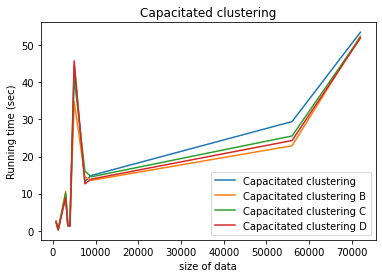

In [ ]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x1 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
x2 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
x3 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
x4 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
# corresponding y axis values
y1 = [2.6,0.22,9.65,1.56,1.272,44.607,13.3,14.89,29.43,53.535]
# y2 = [2.36,0.21,8.83,1.3,1.31,52.983,13.8,13.58,32.7,52.5]
y2 = [2.65,0.263,10.569,1.252,1.491,34.832,14.541,13.582,22.912,52.535]
y3 = [2.16,0.215,10.13,1.55,1.14,41.317,16.07,14.53,25.552,52.171]
y4 = [2.34,0.202,8.94,1.334,1.287,45.83,12.63,13.9,24.32,51.97]

# plotting the points
# plt.plot(x, y)
plt.plot(x1, y1, label = "Capacitated clustering ")
plt.plot(x2, y2, label = "Capacitated clustering B")
plt.plot(x3, y3, label = "Capacitated clustering C")
plt.plot(x4, y4, label = "Capacitated clustering D")


# naming the x axis
plt.xlabel('size of data')
# naming the y axis
plt.ylabel('Running time (sec)')

# giving a title to my graph
plt.title('Capacitated clustering')
plt.legend()
# function to show the plot
plt.show()


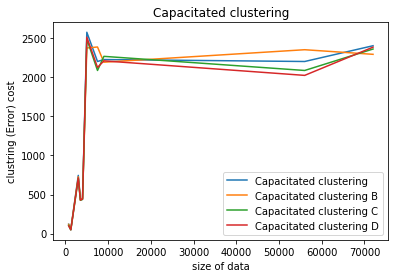

In [ ]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x1 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
x2 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
x3 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
x4 = [750,1250,3000,3500,4000,5000,7500,9000,56000,72000]
# corresponding y axis values
y1 = [119,51,745,441,450,2580,2205,2230,2205,2407]
y2= [117,55,727,426,453,2378,2391,2196,2356,2297]
# y2 =[132,49,749,431,440,2610,2194,2217,2194,2352]
y3 =[104,46,705,426,437,2493,2090,2271,2090,2365]
y4 = [97,47,712,429,441,2517,2129,2213,2027,2389]
# plotting the points
# plt.plot(x, y)
plt.plot(x1, y1, label = "Capacitated clustering ")
plt.plot(x2, y2, label = "Capacitated clustering B")
plt.plot(x3, y3, label = "Capacitated clustering C")
plt.plot(x4, y4, label = "Capacitated clustering D")


# naming the x axis
plt.xlabel('size of data')
# naming the y axis
plt.ylabel('clustring (Error) cost')

# giving a title to my graph
plt.title('Capacitated clustering')
plt.legend()
# function to show the plot
plt.show()


In [ ]:

def Greedy_clustring(matrix_a,centers,C,K):
  mylist={}

  mylist.clear
#for i in range(K):
#  mylist[i]=[]
# print(mylist)
  min_cost=0
  for i in range(C):
    min_val=math.inf
    temp=0
  
    v=matrix_A[:,i]
    for j in range(K):
      u=centers[j]
      cost=hamming(v,u)*len(u)
    
      if(cost<min_val):
        temp=j
      
        min_val=cost
        min_cost+=cost

  # mylist[j]=matrix_A[:,i]
  # print(temp)

    if temp not in mylist:
      mylist[temp]=[]
    mylist[temp].append(list(v))
    

  
 
  print(mylist)  
  print("minimum cost of capacited clustering cost is :",cost)
  return (mylist,cost)

mylist , cost =Greedy_clustring(matrix_A,centers,C,K) 
print(mylist)


{5: [[0, 0, 1, 1, 1], [0, 0, 0, 1, 0], [0, 0, 0, 1, 0], [0, 1, 0, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 1, 1, 1], [0, 0, 0, 1, 1], [0, 1, 0, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 1], [0, 0, 0, 1, 1], [0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 1, 1, 1], [0, 0, 1, 1, 1], [0, 0, 0, 0, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 0, 1, 0], [0, 0, 0, 1, 1], [0, 1, 0, 1, 1], [0, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 1, 1, 1], [0, 1, 0, 1, 0], [0, 0, 0, 1, 1], [0, 0, 0, 1, 0], [0, 1, 0, 1, 0], [0, 0, 1, 1, 0], [0, 0, 0, 1, 1], [0, 0, 0, 0, 1], [0, 1, 0, 1, 1], [0, 1, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1], [0, 0, 1, 1, 0], [1, 0, 0, 1, 1], [0, 1, 0, 1, 1], [0, 0, 0, 1, 1], [0, 0, 0, 1, 0], [0, 0, 1, 1, 1], [0, 0, 0, 0, 1], [0, 0, 0, 1, 1], [0, 0, 0, 1, 0], [0, 1, 0, 1, 1], [1, 0, 0, 1, 1], [0, 0, 0, 1, 1], [0, 1, 0, 1, 0], [0, 0, 1, 1, 1], [0, 0, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 1,

In [ ]:
def finding_cost(CI,centers):
  print("raj")
  print(centers)
  print(DI)
  cost=0
  temp=-1
  for i in range(len(CI)):
    u=CI[i]
    if(len(u)==R):
      cost=cost+hamming(centers[temp],u)*len(u)
    else:
      temp=temp+1
  print("total cost is:",cost)
  return cost

finding_cost(DI,centers)  

raj
[(1, 0, 0, 1, 0), (1, 0, 0, 0, 1), (0, 0, 1, 1, 0), (1, 1, 0, 1, 1), (0, 0, 0, 0, 1)]
[]
total cost is: 0


0

In [ ]:
# mylist

In [ ]:
x = mylist[0]
print(len(x))
print(type(x))
x[0]

139
<class 'list'>


[1, 1, 1, 1, 0]

In [ ]:
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # print(c)
finalcender=[]
finalcender.clear()
for i in range(len(mylist)):
  if i in mylist.keys():
    x = mylist[i]
    x= np.array(x)
    x=x.T
    cenderfind(x,len(x))  
print(finalcender)  

[[1, 1, 1, 1, 1], [1, 1, 0, 0, 1], [1, 0, 1, 0, 1], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [0, 1, 1, 0, 0]]


In [ ]:
if(finalcender == centers):
  print("hello")
else:
  print("hii")  

hii


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
x = finalcender == centers
y = x.all()
if(y==False):
  print("hii")
else:
  print("sonu")  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


AttributeError: ignored

In [ ]:
finalcender

[[0, 1, 0, 0, 1],
 [1, 0, 0, 0, 1],
 [1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1],
 [0, 1, 0, 0, 0],
 [0, 1, 1, 1, 1],
 [1, 0, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 1, 0, 1, 0],
 [1, 1, 1, 0, 1]]

In [ ]:
centers

array([[0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1],
       [1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 1, 0, 1]])

In [ ]:
mylist=[]
finalcender=[]
cost=0
center=centers
count=0
def Greedy_clustring(matrix_a,centers,C,K):
  mylist={}

  mylist.clear
#for i in range(K):
#  mylist[i]=[]
# print(mylist)
  min_cost=0
  for i in range(C):
    min_val=math.inf
    temp=0
  
    v=matrix_A[:,i]
    for j in range(K):
      u=centers[j]
      cost=hamming(v,u)*len(u)
    
      if(cost<min_val):
        temp=j
      
        min_val=cost
        min_cost+=cost

  # mylist[j]=matrix_A[:,i]
  # print(temp)

    if temp not in mylist:
      mylist[temp]=[]
    mylist[temp].append(list(v))
    

  
 
  print(mylist)  
  print("minimum cost of capacited clustering cost is :",cost)
  return (mylist,cost)
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  return c 



# def main():
#     print("Hello World!")
#     mylist,cost = Greedy_clustring(matrix_A,centers,C,K)
    
#     while(True):
#       mylist,cost = Greedy_clustring(matrix_A,centers,C,K)
#       print(mylist)
#       print(cost)
#       finalcender.clear()
#       for i in range(len(mylist)):
#         if i in mylist.keys():
#           x = mylist[i]
#           x= np.array(x)
#           x=x.T
#           c=cenderfind(x,len(x))
#           print(c)
#           np.delete(center,i)
#           np.insert(center, i, c, 0) 
      
#       print("hii")
#       # x = finalcender == centers
#       # y = x.all()
#       # if(y==False):
#       #    print("hii")
#       #    centers.clear()
#       #   #  centers=finalcender

#       # else:
#       #    print("sonu")
#       #    print("final cluster is : ", mylist)
#       #    print("final centers is :", finalcender) 
#       #    print("minimum cost of capacited clustering cost is :", cost)
#       #    break
      
#       if(finalcender == centers):
#         print("sonu")
#         print("final cluster is : ", mylist)
#         print("final centers is :", finalcender) 
#         print("minimum cost of capacited clustering cost is :", cost)
#         break
#       else:
#         print("hii")
#         # count=count+1
#         # # if(count==10):
#         #   break
#         # centers=center
      
      





  


# if __name__ == "__main__":
#     main()

def main():
    print("Hello World!")
    mylist,cost = Greedy_clustring(matrix_A,centers,C,K)
    print(mylist)
    print(cost)
    finalcender.clear()
    for i in range(len(mylist)):
      if i in mylist.keys():
        x = mylist[i]
        x= np.array(x)
        x=x.T
        c=cenderfind(x,len(x))
        print(c)
        np.delete(center,i)
        np.insert(center, i, c, 0)
    
    while(True):
      if(center==centers):
        print("sonu")
        print("final cluster is : ", mylist)
        print("final centers is :", finalcender) 
        print("minimum cost of capacited clustering cost is :", cost)
        break
      else:
        centers=center
        mylist,cost = Greedy_clustring(matrix_A,centers,C,K)
        print(mylist)
        print(cost)
        finalcender.clear()
        for i in range(len(mylist)):
          if i in mylist.keys():
            x = mylist[i]
            x= np.array(x)
            x=x.T
            c=cenderfind(x,len(x))
            print(c)
            np.delete(center,i)
            np.insert(center, i, c, 0)  






  


if __name__ == "__main__":
    main()    


Hello World!


UnboundLocalError: ignored

In [ ]:
if(finalcender==centers):
  print("hii")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
centers

array([[1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1],
       [0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [0, 1, 0, 0, 1]])

In [ ]:
mylist=[]
finalcender=[]
cost=0
center=centers
count=0
def Greedy_clustring(matrix_a,centers,C,K):
  mylist={}

  mylist.clear
#for i in range(K):
#  mylist[i]=[]
# print(mylist)
  min_cost=0
  for i in range(C):
    min_val=math.inf
    temp=0
  
    v=matrix_A[:,i]
    for j in range(K):
      u=centers[j]
      cost=hamming(v,u)*len(u)
    
      if(cost<min_val):
        temp=j
      
        min_val=cost
        min_cost+=cost

  # mylist[j]=matrix_A[:,i]
  # print(temp)

    if temp not in mylist:
      mylist[temp]=[]
    mylist[temp].append(list(v))
    

  
 
  print(mylist)  
  print("minimum cost of capacited clustering cost is :",cost)
  return (mylist,cost)
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  return c 



def main():
    print("Hello World!")
    mylist,cost = Greedy_clustring(matrix_A,centers,C,K)
    
    while(True):
      mylist,cost = Greedy_clustring(matrix_A,centers,C,K)
      print(mylist)
      print(cost)
      finalcender.clear()
      totalcost=cost
      for i in range(len(mylist)):
        if i in mylist.keys():
          x = mylist[i]
          x= np.array(x)
          x=x.T
          c=cenderfind(x,len(x))
          print(c)
          np.delete(center,i)
          np.insert(center, i, c, 0) 
      
      print("hii")
      # x = finalcender == centers
      # y = x.all()
      # if(y==False):
      #    print("hii")
      #    centers.clear()
      #   #  centers=finalcender

      # else:
      #    print("sonu")
      #    print("final cluster is : ", mylist)
      #    print("final centers is :", finalcender) 
      #    print("minimum cost of capacited clustering cost is :", cost)
      #    break
      
      if(finalcender == centers):
        print("sonu")
        print("final cluster is : ", mylist)
        print("final centers is :", finalcender) 
        print("minimum cost of capacited clustering cost is :", cost)
        break
      else:
        print("hii")
        if(totalcost==cost):
          break
        # count=count+1
        # # if(count==10):
        #   break
        # centers=center
      
      





  


if __name__ == "__main__":
    main()


Hello World!
{0: [[0, 1, 1, 0, 0], [0, 1, 1, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0], [0, 1, 1, 0, 0], [0, 1, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 0, 0], [1, 1, 1, 1, 0], [1, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0], [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 0], [1, 1, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0], [0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0], [0, 1, 1, 0, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 0], [0, 1, 1, 0, 0], [0, 0, 1, 1, 0], [1, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [0, 0, 1, 1, 0], [0, 1, 1, 1, 0], [0, 1, 1, 1, 1], [1, 1, 1, 1, 0], [0, 1, 1, 1, 1], [0, 0, 1, 1, 0], [0, 1, 1, 1, 1], [0, 1, 1, 1, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [ ]:
median=[]
median.append(matrix_A[:,0])
for i in range(C):
  u=matrix_A[:,i]
  if u in median:
    print("")
  else:
    median.append(u)  



ValueError: ignored

In [ ]:
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return c 
def median_set_creation(marrix_A):

  for j in range(len(matrix_A)):
    for i in range(C):
      for q in range(R):
        u=matrix_A[:,i]
        v=matrix_A[:,j]
        cost=hamming(v,u)*len(v)
        if cost<=q:
          median.append(v)
      cenderfind(median, len(median))
      median.clear()
finalcender=[]
median=[]
median.clear()
median_set_creation(matrix_A)        
print(median)


print(len(median))
print(len(finalcender))
print(finalcender)  

[]
0
750
[[0, 0, 0, 0, 0], [0, 0], [0, 0, 0], [0, 0], [0, 0, 0, 0], [0, 0], [0], [0, 0], [0], [0, 0, 0], [0, 0], [0, 0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0], [0], [0], [0], [], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0], [0], [0, 0], [0], [0], [0, 0, 0], [0, 0, 0, 0], [0], [0, 0], [0], [0, 0], [0], [0, 0, 0, 0], [0, 0], [0, 0, 0], [0, 0], [0, 0], [0], [0], [0, 0, 0], [0, 0], [0, 0, 0, 0], [0, 0], [0, 0, 0], [0, 0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0], [0, 0], [0, 0, 0], [0], [0], [0], [0, 0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0], [0, 0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0], [0], [0, 0, 0, 0, 0], [0, 0], [0, 0], [0, 0], [0, 0, 0], [0, 0], [0, 0, 0], [0, 0], [0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0], [0, 0], [0], [0, 0, 0, 0, 0], [0, 0, 0, 0], [0], [0, 0, 0, 0], [0, 0], [0, 0, 0], [0, 0, 0], [0], [0], [0], [0, 0, 0, 0], [0], [0, 0, 0], [0, 0], [0, 0], [0, 0], [0], [0, 0, 0], [0, 0, 0, 0, 0], [0], [0, 0], [0, 0, 0, 0], [0, 0, 0], [0, 0], [0, 0, 0, 0], [0, 0], [0, 0, 0

In [ ]:
len(matrix_A[0])
R
C
R*C

750

In [ ]:
def cenderfind(cluster,R):
  
  count0=0
  count1=0
  c=[]
  for i in range(R):
    for j in range(len(cluster[0])):
      if (cluster[i][j]==0):
        count0=count0+1
      else:
        count1=count1+1
    if(count1<=count0):
      c.append(0)
    else:
      c.append(1)

    count0=0
    count1=0



  finalcender.append(c)
  # return c 
def median_set_creation(marrix_A):
  for j in range(len(matrix_A)):
    for i in range(C):
      for q in range(R):
        u=matrix_A[:,i]
        v=matrix_A[:,j]
        cost=hamming(v,u)*len(v)
        if cost<=q:
          median.append(v)
          x= np.array(median)
          x=x.T
      cenderfind(x, len(x))
      median.clear()
finalcender=[]
median=[]
median.clear()
median_set_creation(matrix_A)        
print(median)


print(len(median))
print(len(finalcender))
print(finalcender)  

[]
0
750
[[0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 